# Returns and Performance: Measuring Investment Success

**Time:** 15 minutes

**Prerequisites:** 01-03_*.ipynb

---

"I made \$1,000!" sounds great, but is it? If you invested \$100,000, that's only 1%. If you invested \$5,000, that's 20%!

**Returns** standardize performance so we can compare apples to apples.

## Simple Return: The Basic Calculation

**Simple Return** (also called Holding Period Return):

$$R = \frac{P_{end} - P_{start}}{P_{start}} \times 100\%$$

Or equivalently:

$$R = \left(\frac{P_{end}}{P_{start}} - 1\right) \times 100\%$$

**Example:**
- Bought at \$100, now worth \\$120
- Return = (\$120 - \\$100) /\\$100 × 100% = **20%**

**Mental Model:** "What percentage did my investment grow (or shrink)?"

In [2]:
# Install required packages
!pip install -q yfinance pandas numpy matplotlib

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np

def calculate_simple_return(start_price, end_price):
    """Calculate simple return between two prices."""
    return ((end_price - start_price) / start_price) * 100

# Example calculations
examples = [
    {"start": 100, "end": 120, "description": "Gained $20 on $100"},
    {"start": 100, "end": 80, "description": "Lost $20 on $100"},
    {"start": 50, "end": 75, "description": "Gained $25 on $50"},
    {"start": 200, "end": 220, "description": "Gained $20 on $200"}
]

print("Simple Return Examples")
print("=" * 60)
print(f"{'Description':<25} {'Start':>10} {'End':>10} {'Return':>12}")
print("-" * 60)

for ex in examples:
    ret = calculate_simple_return(ex['start'], ex['end'])
    print(f"{ex['description']:<25} ${ex['start']:>9} ${ex['end']:>9} {ret:>+11.1f}%")

print("\nKey Insight: Same $20 gain can be very different returns!")

Simple Return Examples
Description                    Start        End       Return
------------------------------------------------------------
Gained $20 on $100        $      100 $      120       +20.0%
Lost $20 on $100          $      100 $       80       -20.0%
Gained $25 on $50         $       50 $       75       +50.0%
Gained $20 on $200        $      200 $      220       +10.0%

Key Insight: Same $20 gain can be very different returns!


## Daily Returns: Tracking Day-to-Day Changes

**Daily Return** = Percentage change from one day to the next.

$$R_t = \frac{P_t - P_{t-1}}{P_{t-1}} \times 100\%$$

Where:
- $P_t$ = Today's closing price
- $P_{t-1}$ = Yesterday's closing price

Daily returns are the building blocks for most performance analysis.

In [4]:
def get_daily_returns(ticker, period="6mo"):
    """Calculate daily returns for a stock.

    Args:
        ticker: Stock symbol
        period: Time period (1mo, 3mo, 6mo, 1y, 2y)

    Returns:
        DataFrame with prices and returns
    """
    stock = yf.Ticker(ticker)
    hist = stock.history(period=period)

    # Calculate daily returns
    # pct_change() computes: (current - previous) / previous
    hist['daily_return'] = hist['Close'].pct_change() * 100

    return hist[['Close', 'daily_return']].dropna()

# Get Apple daily returns
aapl_returns = get_daily_returns("AAPL", "3mo")

print("Apple (AAPL) Daily Returns - Last 10 Days")
print("=" * 45)
print(aapl_returns.tail(10).to_string())

print(f"\nTotal trading days: {len(aapl_returns)}")
print(f"Average daily return: {aapl_returns['daily_return'].mean():.3f}%")
print(f"Best day: {aapl_returns['daily_return'].max():.2f}%")
print(f"Worst day: {aapl_returns['daily_return'].min():.2f}%")

Apple (AAPL) Daily Returns - Last 10 Days
                                Close  daily_return
Date                                               
2026-01-20 00:00:00-05:00  246.699997     -3.455564
2026-01-21 00:00:00-05:00  247.649994      0.385082
2026-01-22 00:00:00-05:00  248.350006      0.282662
2026-01-23 00:00:00-05:00  248.039993     -0.124829
2026-01-26 00:00:00-05:00  255.410004      2.971299
2026-01-27 00:00:00-05:00  258.269989      1.119762
2026-01-28 00:00:00-05:00  256.440002     -0.708556
2026-01-29 00:00:00-05:00  258.279999      0.717515
2026-01-30 00:00:00-05:00  259.480011      0.464617
2026-02-02 00:00:00-05:00  270.010010      4.058116

Total trading days: 61
Average daily return: 0.014%
Best day: 4.06%
Worst day: -3.46%


## Visualizing Daily Returns

Daily returns distribution tells us about volatility and risk.

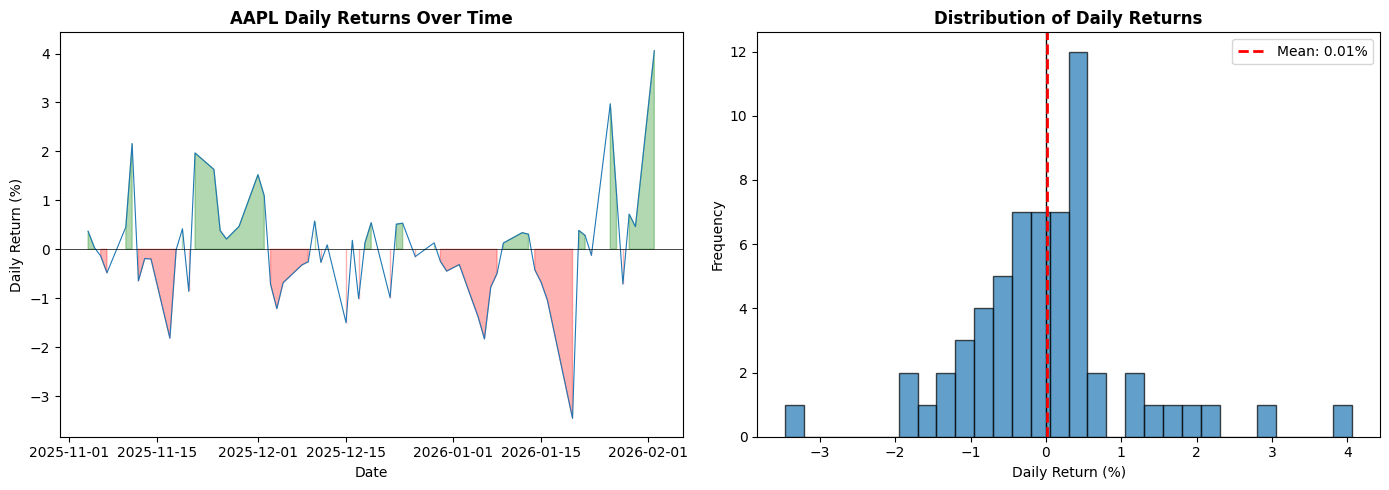

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Time series of returns
axes[0].plot(aapl_returns.index, aapl_returns['daily_return'], linewidth=0.8)
axes[0].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
axes[0].fill_between(aapl_returns.index, aapl_returns['daily_return'], 0,
                     where=(aapl_returns['daily_return'] >= 0), color='green', alpha=0.3)
axes[0].fill_between(aapl_returns.index, aapl_returns['daily_return'], 0,
                     where=(aapl_returns['daily_return'] < 0), color='red', alpha=0.3)
axes[0].set_title('AAPL Daily Returns Over Time', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Daily Return (%)')

# Histogram of returns
axes[1].hist(aapl_returns['daily_return'], bins=30, edgecolor='black', alpha=0.7)
axes[1].axvline(x=0, color='black', linestyle='-', linewidth=1)
axes[1].axvline(x=aapl_returns['daily_return'].mean(), color='red', linestyle='--',
                linewidth=2, label=f"Mean: {aapl_returns['daily_return'].mean():.2f}%")
axes[1].set_title('Distribution of Daily Returns', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Daily Return (%)')
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.tight_layout()
plt.show()

## Cumulative Returns: The Full Journey

**Cumulative Return** shows the total growth of an investment over time.

$$\text{Cumulative Return} = \prod_{i=1}^{n}(1 + r_i) - 1$$

Where $r_i$ is each period's return (as a decimal).

**Translation:** Multiply all the (1 + return) values together, then subtract 1.

**Why not just add?** Because returns compound. A 10% gain followed by 10% loss doesn't return you to break-even:
- $100 × 1.10 = $110
- $110 × 0.90 = $99 (not $100!)

1-Year Cumulative Returns
AAPL: +19.0%
NVDA: +59.1%
MSFT: +3.8%
GOOGL: +71.5%


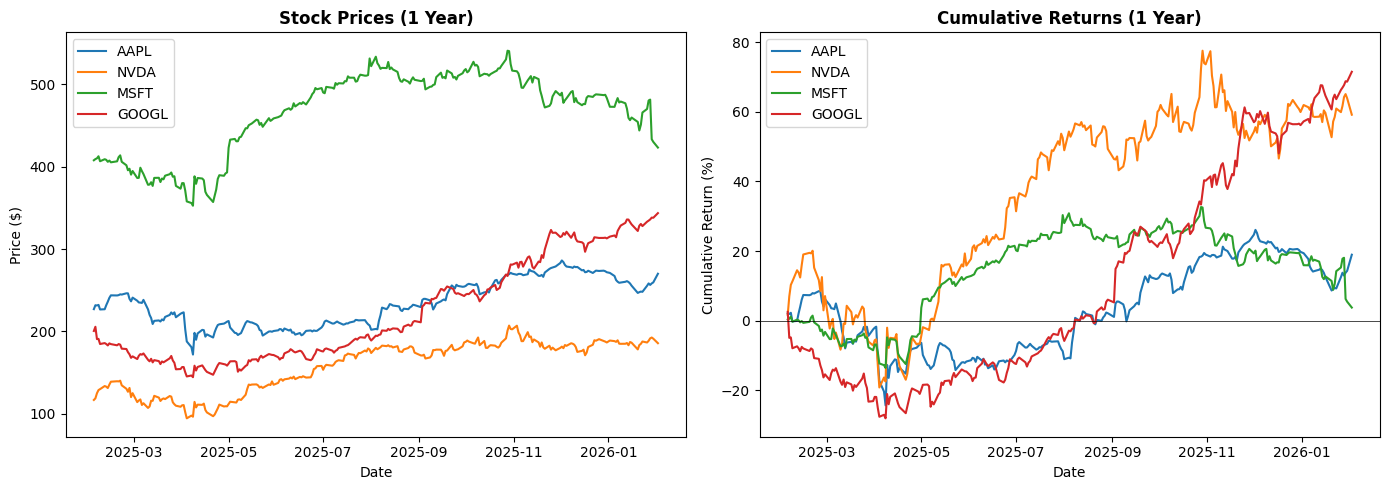

In [6]:
def calculate_cumulative_returns(ticker, period="1y"):
    """Calculate cumulative returns over time."""
    stock = yf.Ticker(ticker)
    hist = stock.history(period=period)

    # Daily returns as decimals
    daily_returns = hist['Close'].pct_change().dropna()

    # Cumulative returns: product of (1 + r) for each day
    cumulative = (1 + daily_returns).cumprod() - 1
    cumulative = cumulative * 100  # Convert to percentage

    return hist['Close'], cumulative

# Compare cumulative returns of multiple stocks
tickers = ["AAPL", "NVDA", "MSFT", "GOOGL"]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

print("1-Year Cumulative Returns")
print("=" * 40)

for ticker in tickers:
    prices, cum_returns = calculate_cumulative_returns(ticker, "1y")
    axes[0].plot(prices.index, prices, label=ticker)
    axes[1].plot(cum_returns.index, cum_returns, label=ticker)
    print(f"{ticker}: {cum_returns.iloc[-1]:+.1f}%")

axes[0].set_title('Stock Prices (1 Year)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Price ($)')
axes[0].legend()

axes[1].set_title('Cumulative Returns (1 Year)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Cumulative Return (%)')
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
axes[1].legend()

plt.tight_layout()
plt.show()

## Annualized Return: Comparing Apples to Apples

What if one investment was held for 6 months and another for 3 years? We need to **annualize**.

**Annualized Return** standardizes to a yearly rate:

$$R_{annual} = (1 + R_{total})^{\frac{365}{days}} - 1$$

Or for trading days (approx 252 per year):

$$R_{annual} = (1 + R_{total})^{\frac{252}{trading\_days}} - 1$$

**Example:**
- You earned 10% in 6 months
- Annualized = (1.10)^(12/6) - 1 = (1.10)^2 - 1 = 21%

In [7]:
def annualize_return(total_return, trading_days, days_per_year=252):
    """Convert a holding period return to its annualized equivalent.

    Uses compound growth: what yearly rate would produce this return
    if growth continued at the same pace?

    Args:
        total_return: Decimal return (0.10 = 10% gain, -0.10 = 10% loss)
        trading_days: Number of trading days held
        days_per_year: Trading days in a year (default 252)

    Returns:
        Annualized return as percentage (21.0 = 21%)
    """
    if total_return <= -1:
        return -100.0

    periods_per_year = days_per_year / trading_days
    annualized = (1 + total_return) ** periods_per_year - 1
    return annualized * 100

# Examples
print("Annualizing Returns")
print("=" * 55)
print(f"{'Scenario':<30} {'Total':>10} {'Days':>8} {'Annual':>10}")
print("-" * 55)

scenarios = [
    ("6-month 10% gain", 0.10, 126),
    ("3-month 5% gain", 0.05, 63),
    ("2-year 50% gain", 0.50, 504),
    ("1-year 25% gain", 0.25, 252),
    ("6-month 10% loss", -0.10, 126),
]

for desc, total, days in scenarios:
    annual = annualize_return(total, days)
    print(f"{desc:<30} {total*100:>+9.1f}% {days:>8} {annual:>+9.1f}%")

Annualizing Returns
Scenario                            Total     Days     Annual
-------------------------------------------------------
6-month 10% gain                   +10.0%      126     +21.0%
3-month 5% gain                     +5.0%       63     +21.6%
2-year 50% gain                    +50.0%      504     +22.5%
1-year 25% gain                    +25.0%      252     +25.0%
6-month 10% loss                   -10.0%      126     -19.0%


## Volatility: The Standard Deviation of Returns

**Volatility** measures how much returns fluctuate. High volatility = more risk.

$$\sigma = \sqrt{\frac{1}{n-1}\sum_{i=1}^{n}(r_i - \bar{r})^2}$$

Where:
- $r_i$ = each return
- $\bar{r}$ = average return
- $n$ = number of observations

**Annualized Volatility** (for daily returns):

$$\sigma_{annual} = \sigma_{daily} \times \sqrt{252}$$

Why √252? Because variance adds, so standard deviation scales by square root of time.

In [8]:
def calculate_volatility(ticker, period="1y"):
    """Calculate daily and annualized volatility."""
    stock = yf.Ticker(ticker)
    hist = stock.history(period=period)

    # Daily returns as decimals (0.01 = 1%)
    daily_returns = hist['Close'].pct_change().dropna()

    # Standard deviation of daily returns
    daily_vol = daily_returns.std()

    # Annualized volatility
    annual_vol = daily_vol * np.sqrt(252)

    return {
        'ticker': ticker,
        'daily_vol': daily_vol * 100,      # Convert to % for display
        'annual_vol': annual_vol * 100,    # Convert to % for display
        'avg_daily_return': daily_returns.mean() * 100
    }

# Compare volatility of different stocks
tickers = ["AAPL", "NVDA", "MSFT", "GOOGL", "TSLA"]

print("Volatility Comparison (1 Year)")
print("=" * 60)
print(f"{'Ticker':<8} {'Daily Vol':>12} {'Annual Vol':>14} {'Risk Level':>15}")
print("-" * 60)

results = []
for ticker in tickers:
    stats = calculate_volatility(ticker)
    results.append(stats)

    # Classify risk level
    if stats['annual_vol'] < 20:
        risk = "Low"
    elif stats['annual_vol'] < 35:
        risk = "Moderate"
    elif stats['annual_vol'] < 50:
        risk = "High"
    else:
        risk = "Very High"

    print(f"{stats['ticker']:<8} {stats['daily_vol']:>11.2f}% {stats['annual_vol']:>13.1f}% {risk:>15}")

Volatility Comparison (1 Year)
Ticker      Daily Vol     Annual Vol      Risk Level
------------------------------------------------------------
AAPL            2.01%          31.9%        Moderate
NVDA            2.78%          44.2%            High
MSFT            1.61%          25.5%        Moderate
GOOGL           2.01%          31.8%        Moderate
TSLA            3.93%          62.3%       Very High


## Complete Performance Summary

Let's put it all together in a comprehensive performance analysis.

In [9]:
def performance_summary(ticker, period="1y"):
    """Generate comprehensive performance summary."""
    stock = yf.Ticker(ticker)
    hist = stock.history(period=period)
    info = stock.info

    if len(hist) < 2:
        return None

    # Price data
    start_price = hist['Close'].iloc[0]
    end_price = hist['Close'].iloc[-1]
    high = hist['Close'].max()
    low = hist['Close'].min()

    # Returns
    daily_returns = hist['Close'].pct_change().dropna()
    total_return = (end_price / start_price - 1) * 100
    trading_days = len(daily_returns)
    annualized_return = ((1 + total_return/100) ** (252/trading_days) - 1) * 100

    # Volatility
    daily_vol = daily_returns.std() * 100
    annual_vol = daily_vol * np.sqrt(252)

    # Win/Loss days
    up_days = (daily_returns > 0).sum()
    down_days = (daily_returns < 0).sum()
    win_rate = up_days / trading_days * 100

    return {
        'ticker': ticker,
        'name': info.get('shortName', 'N/A'),
        'start_price': start_price,
        'end_price': end_price,
        'period_high': high,
        'period_low': low,
        'total_return': total_return,
        'annualized_return': annualized_return,
        'daily_volatility': daily_vol,
        'annual_volatility': annual_vol,
        'trading_days': trading_days,
        'up_days': up_days,
        'down_days': down_days,
        'win_rate': win_rate,
        'best_day': daily_returns.max() * 100,
        'worst_day': daily_returns.min() * 100
    }

# Generate summary for a stock
summary = performance_summary("NVDA", "1y")

print("=" * 60)
print(f"  {summary['ticker']} - {summary['name']}")
print(f"  1-Year Performance Summary")
print("=" * 60)

print(f"\n  PRICE HISTORY")
print(f"  Start Price:      ${summary['start_price']:,.2f}")
print(f"  End Price:        ${summary['end_price']:,.2f}")
print(f"  Period High:      ${summary['period_high']:,.2f}")
print(f"  Period Low:       ${summary['period_low']:,.2f}")

print(f"\n  RETURNS")
print(f"  Total Return:     {summary['total_return']:+.1f}%")
print(f"  Annualized:       {summary['annualized_return']:+.1f}%")

print(f"\n  RISK/VOLATILITY")
print(f"  Daily Volatility: {summary['daily_volatility']:.2f}%")
print(f"  Annual Volatility:{summary['annual_volatility']:.1f}%")

print(f"\n  TRADING STATISTICS")
print(f"  Trading Days:     {summary['trading_days']}")
print(f"  Up Days:          {summary['up_days']} ({summary['win_rate']:.1f}%)")
print(f"  Down Days:        {summary['down_days']}")
print(f"  Best Day:         {summary['best_day']:+.2f}%")
print(f"  Worst Day:        {summary['worst_day']:+.2f}%")
print("=" * 60)

  NVDA - NVIDIA Corporation
  1-Year Performance Summary

  PRICE HISTORY
  Start Price:      $116.63
  End Price:        $185.61
  Period High:      $207.03
  Period Low:       $94.29

  RETURNS
  Total Return:     +59.1%
  Annualized:       +59.7%

  RISK/VOLATILITY
  Daily Volatility: 2.78%
  Annual Volatility:44.2%

  TRADING STATISTICS
  Trading Days:     250
  Up Days:          135 (54.0%)
  Down Days:        115
  Best Day:         +18.72%
  Worst Day:        -8.69%


## Key Takeaways

### Formulas You've Learned:

1. **Simple Return** = (End - Start) / Start × 100%

2. **Daily Return** = (Today - Yesterday) / Yesterday × 100%

3. **Cumulative Return** = Product of (1 + each return) - 1

4. **Annualized Return** = (1 + Total Return)^(252/days) - 1

5. **Volatility** = Standard deviation of returns × √252 (for annual)

### Key Concepts:

- **Returns** standardize performance (percentages, not dollars)
- **Daily returns** are the building blocks of analysis
- **Cumulative returns** compound (multiply, don't add)
- **Annualization** lets you compare different time periods
- **Volatility** measures risk/uncertainty

### Why This Matters for AI Agents:

AI agents will need to:
- Calculate returns for performance reporting
- Compare investments using standardized metrics
- Assess risk through volatility analysis
- Use daily returns for risk calculations (Sharpe, VaR, etc.)

**Next Notebook:** We'll combine return and risk into the **Sharpe Ratio** - the gold standard for risk-adjusted performance.